### 하이퍼파라미터(자체적으로 학습하지 않는. 지정해줘야 하는 변수)
### 파라미터(모델이 자체적으로 학습하는 변수)


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/Users/sejinmoon/Desktop/Coding/Bluemoon/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
X = df[['V5', 'V6', 'V17', 'V19']]
Y = df['Class']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### 1. 수동 리서치

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
    
model = RandomForestClassifier(random_state=101).fit(X_train, Y_train)

In [8]:
predict = model.predict(X_test)

#혼동행렬 인쇄
print(confusion_matrix(Y_test, predict))

[[56851     7]
 [   27    77]]


In [10]:
accuracy = accuracy_score(Y_test, predict)
print(accuracy)

0.999403110845827


### Random Research

In [12]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [19]:
#하이퍼파라미터
random_search = {
    "criterion" : ['entropy', 'gini'],
    "max_depth" : [2],
    "max_features" : ['auto', 'sqrt'],
    "min_samples_leaf" : [4, 6, 8],
    "min_samples_split" : [5, 7, 10],
    "n_estimators" : [20]
}

In [20]:
clf = RandomForestClassifier()
model = RandomizedSearchCV(
    estimator = clf,
    param_distributions = random_search,
    n_iter = 10,
    cv = 4,
    verbose = 1,
    random_state = 101,
    n_jobs = -1
)
model.fit(X_train, Y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

In [23]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008882,0.003963,0.000000,0.000000,20,5,4,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,5
1,0.008811,0.002930,0.000000,0.000000,20,7,8,auto,2,entropy,"{'n_estimators': 20, 'min_samples_split': 7, '...",NaN,NaN,NaN,NaN,NaN,NaN,5
2,0.008417,0.003004,0.000000,0.000000,20,10,4,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 10, ...",NaN,NaN,NaN,NaN,NaN,NaN,5
3,2.082465,0.025129,0.016313,0.001670,20,10,6,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 10, ...",0.998560,0.998666,0.998999,0.999087,0.998828,0.000220,4
4,2.100337,0.042542,0.014475,0.003430,20,5,6,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",0.999087,0.999017,0.998508,0.999070,0.998920,0.000240,2
5,0.007299,0.001696,0.000000,0.000000,20,10,8,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 10, ...",NaN,NaN,NaN,NaN,NaN,NaN,5
6,0.004529,0.000561,0.000000,0.000000,20,7,8,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 7, '...",NaN,NaN,NaN,NaN,NaN,NaN,5
7,2.001967,0.056447,0.013644,0.003405,20,5,4,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",0.998718,0.998578,0.998999,0.999087,0.998846,0.000206,3
8,2.044032,0.032402,0.012379,0.002263,20,5,8,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",0.998859,0.999034,0.999017,0.998824,0.998933,0.000093,1
9,0.007125,0.003401,0.000000,0.000000,20,10,4,auto,2,entropy,"{'n_estimators': 20, 'min_samples_split': 10, ...",NaN,NaN,NaN,NaN,NaN,NaN,5


<Axes: xlabel='param_criterion', ylabel='param_n_estimators'>

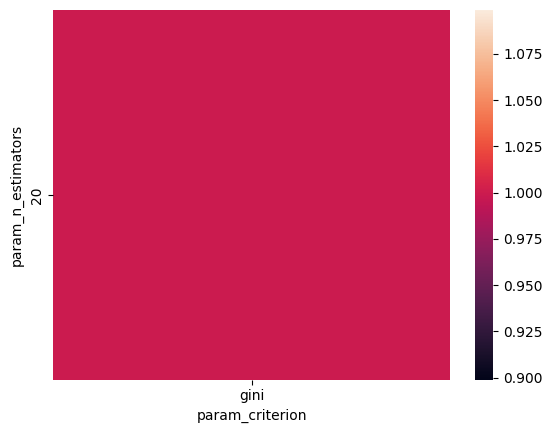

In [26]:
import seaborn as sns
table = pd.pivot_table(pd.DataFrame(model.cv_results_),
                      values = 'mean_test_score',
                      index = 'param_n_estimators',
                      columns = 'param_criterion')
sns.heatmap(table)

## Grid Research

In [27]:
from sklearn.model_selection import GridSearchCV

grid_search = {
    "criterion" : ['entropy', 'gini'],
    "max_depth" : [2],
    "max_features" : ['auto', 'sqrt'],
    "min_samples_leaf" : [4, 6, 8],
    "min_samples_split" : [5, 7, 10],
    "n_estimators" : [20]
}

clf_g = RandomForestClassifier()
model = GridSearchCV(estimator = clf_g,
                    param_grid = grid_search,
                    cv = 4,
                    n_jobs = -1)
model.fit(X_train, Y_train)

/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/sejinmoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [20]})

In [28]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007994,0.001157,0.000000,0.000000,entropy,2,auto,4,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,19
1,0.007514,0.002242,0.000000,0.000000,entropy,2,auto,4,7,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,19
2,0.008882,0.001516,0.000000,0.000000,entropy,2,auto,4,10,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,19
3,0.005934,0.000801,0.000000,0.000000,entropy,2,auto,6,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,19
4,0.004550,0.000395,0.000000,0.000000,entropy,2,auto,6,7,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,19
5,0.004262,0.000296,0.000000,0.000000,entropy,2,auto,6,10,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,19
6,0.005013,0.001106,0.000000,0.000000,entropy,2,auto,8,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,19
7,0.004206,0.000282,0.000000,0.000000,entropy,2,auto,8,7,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,19
8,0.003831,0.000181,0.000000,0.000000,entropy,2,auto,8,10,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,19
9,2.495808,0.068720,0.017022,0.001637,entropy,2,sqrt,4,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999087,0.999105,0.999017,0.998701,0.998977,0.000163,9


In [30]:
#최고의 파라미터 조합
model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=6,
                       min_samples_split=5, n_estimators=20)

In [29]:
predict = model.best_estimator_.predict(X_test)
accuracy_grid = accuracy_score(Y_test, predict)
print(accuracy_grid)

0.9992626663389628


### 다른 데이터셋으로 한 번 더

In [36]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

#scipy == 통계, 수학적 계산 등을 쉽게 해주는 라이브러리
#균등분포 생성 함수
from scipy.stats import uniform

In [38]:
distribution

{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x3186005d0>,
 'penalty': ['l2', 'l1']}

In [37]:
iris = load_iris()

logistic = LogisticRegression(solver = 'saga', tol = 1e-2, max_iter = 200, random_state = 0)
distribution = dict(C=uniform(loc=0, scale=4),penalty = ['l2','l1'])

clf = RandomizedSearchCV(logistic,
                        distribution,
                        random_state = 0)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [39]:
print(f"Best Score : {search.best_score_}")

Best Score : 0.9800000000000001


### Iris - Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [42]:
parameter = {'kernel':('linear','rbf'),
            'C':[1,10]}

svc = svm.SVC()
clf = GridSearchCV(svc, parameter)
clf.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [43]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [44]:
clf.best_score_

0.9800000000000001